# Bayer pattern 

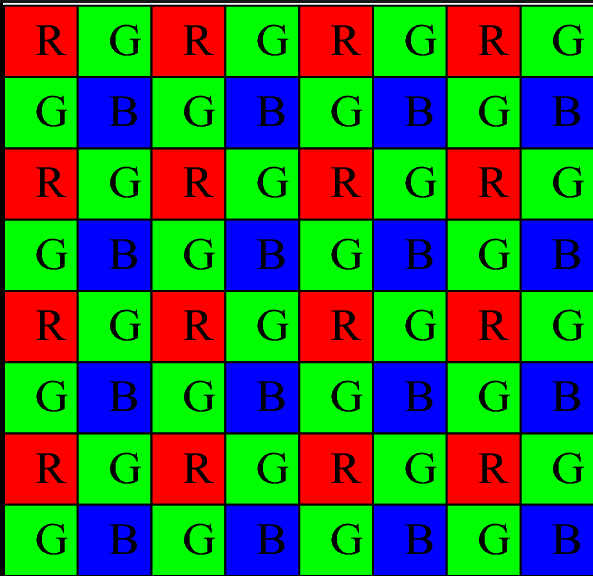

# Bilinear Interpolation Algorithms 


![image.png](attachment:image.png)

The algorithm of bilinear interpolation for: 

* the green pixels at the red and blue positions is: the average of the upper, lower, left and right pixel values. For example: G8=(G3+G7+G9+G13)/4 

* the red and blue pixels at the green positions is: the average of two adjacent pixel values in corresponding colour. For example: B7=(B6+B8)/2 and R7=(R2+R12)/2

* the red and blue pixels at the blue and red positions is: the average of four adjacent diagonal pixel values. For example: R8=(R2+R4+R12+R14)/4 and B12=(B6+B8+B16+B18)/4

* need to pad the image 
 

In [119]:
import numpy as np

rggb_tile = np.array([[1, 2], [3, 4]], dtype=np.float32)
repeats = (2,2)
rggb_tiles = np.tile(rggb_tile, repeats)
rggb_tiles

array([[1., 2., 1., 2.],
       [3., 4., 3., 4.],
       [1., 2., 1., 2.],
       [3., 4., 3., 4.]], dtype=float32)

In [1]:
def extract_channels(bayer):
    r, g, b = np.zeros_like(bayer), np.zeros_like(bayer), np.zeros_like(bayer)
    r[::2, ::2] = bayer[::2, ::2]  # Red channel
    g[1::2, ::2] = bayer[1::2, ::2]  # Green channel for even rows
    g[::2, 1::2] = bayer[::2, 1::2]  # Green channel for odd rows
    b[1::2, 1::2] = bayer[1::2, 1::2]  # Blue channel
    return r, g, b

In [42]:
r, g, b = extract_channels(rggb_tiles)

In [43]:
r

array([[1., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [44]:
g

array([[0., 2., 0., 2.],
       [3., 0., 3., 0.],
       [0., 2., 0., 2.],
       [3., 0., 3., 0.]], dtype=float32)

In [45]:
b

array([[0., 0., 0., 0.],
       [0., 4., 0., 4.],
       [0., 0., 0., 0.],
       [0., 4., 0., 4.]], dtype=float32)

In [46]:
pad_r = np.pad(r, (1,1), mode='constant')
pad_r

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
pad_r[1:-1:2, 2:-1:2] = (pad_r[1:-1:2, 1:-1:2] + pad_r[1:-1:2, 3::2]) / 2
# pad_r[1:-1:2, 1:-1:2].shape
# pad_r[1:-1:2, 3::2].shape
pad_r

array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 1. , 1. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 1. , 1. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. ]], dtype=float32)

In [49]:
pad_r[2:-1:2, 1:-1:2] = (pad_r[1:-1:2, 1:-1:2] + pad_r[3::2, 1:-1:2]) / 2
pad_r

array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 1. , 1. , 1. , 0.5, 0. ],
       [0. , 1. , 0. , 1. , 0. , 0. ],
       [0. , 1. , 1. , 1. , 0.5, 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. ]], dtype=float32)

In [50]:
pad_r[2:-1:2, 2:-1:2] = (pad_r[1:-1:2, 1:-1:2] + pad_r[3::2, 1:-1:2] + pad_r[1:-1:2, 3::2] + pad_r[3::2, 3::2]) / 4
pad_r

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 1.  , 1.  , 0.5 , 0.  ],
       [0.  , 1.  , 1.  , 1.  , 0.5 , 0.  ],
       [0.  , 1.  , 1.  , 1.  , 0.5 , 0.  ],
       [0.  , 0.5 , 0.5 , 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [80]:
pad_r[1:-1, 1:-1]

array([[1.  , 1.  , 1.  , 0.5 ],
       [1.  , 1.  , 1.  , 0.5 ],
       [1.  , 1.  , 1.  , 0.5 ],
       [0.5 , 0.5 , 0.5 , 0.25]], dtype=float32)

In [55]:
pad_g = np.pad(g, (1,1), mode='constant')
pad_g

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 2., 0.],
       [0., 3., 0., 3., 0., 0.],
       [0., 0., 2., 0., 2., 0.],
       [0., 3., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
pad_g[1:-1:2, 1:-1:2] = (pad_g[0:-2:2, 1:-1:2] + pad_g[1:-1:2, 0:-2:2] + pad_g[1:-1:2, 2::2] + pad_g[2::2, 1:-1:2]) / 4
pad_g

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.25, 2.  , 1.75, 2.  , 0.  ],
       [0.  , 3.  , 0.  , 3.  , 0.  , 0.  ],
       [0.  , 2.  , 2.  , 2.5 , 2.  , 0.  ],
       [0.  , 3.  , 0.  , 3.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [63]:
pad_g[2::2, 2::2] = (pad_g[2::2, 1:-2:2] + pad_g[1:-1:2, 2::2] + pad_g[2::2, 3::2] + pad_g[3::2, 2::2]) / 4
pad_g

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.25, 2.  , 1.75, 2.  , 0.  ],
       [0.  , 3.  , 2.5 , 3.  , 1.75, 0.  ],
       [0.  , 2.  , 2.  , 2.5 , 2.  , 0.  ],
       [0.  , 3.  , 2.  , 3.  , 1.25, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]], dtype=float32)

In [76]:
pad_b = np.pad(b, (1,1), mode='constant')
pad_b

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 4., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [77]:
pad_b[1:-1:2, 2:-1:2] = (pad_b[0:-2:2, 2:-1:2] + pad_b[2::2, 2::2]) / 2
pad_b

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 2., 0.],
       [0., 0., 4., 0., 4., 0.],
       [0., 0., 4., 0., 4., 0.],
       [0., 0., 4., 0., 4., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [78]:
pad_b[2:-1:2, 1:-1:2] = (pad_b[2::2, 0:-2:2] + pad_b[2::2, 2::2]) / 2
pad_b

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 2., 0.],
       [0., 2., 4., 4., 4., 0.],
       [0., 0., 4., 0., 4., 0.],
       [0., 2., 4., 4., 4., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [79]:
pad_b[1:-1:2, 1:-1:2] = (pad_b[0:-2:2, 0:-2:2] + pad_b[0:-2:2, 2:-1:2] + pad_b[2:-1:2, 0:-2:2] + pad_b[2::2, 2::2]) / 4
pad_b

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 2., 2., 2., 0.],
       [0., 2., 4., 4., 4., 0.],
       [0., 2., 4., 4., 4., 0.],
       [0., 2., 4., 4., 4., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [2]:
def bilinear_interpolation(bayer):
    r, g, b = extract_channels(bayer)
    # red channel 
    pad_r = np.pad(r, (1,1), mode='constant')
    pad_r[1:-1:2, 2:-1:2] = (pad_r[1:-1:2, 1:-1:2] + pad_r[1:-1:2, 3::2]) / 2
    pad_r[2:-1:2, 1:-1:2] = (pad_r[1:-1:2, 1:-1:2] + pad_r[3::2, 1:-1:2]) / 2
    pad_r[2:-1:2, 2:-1:2] = (pad_r[1:-1:2, 1:-1:2] + pad_r[3::2, 1:-1:2] + pad_r[1:-1:2, 3::2] + pad_r[3::2, 3::2]) / 4
    new_r = pad_r[1:-1, 1:-1]
    # green channel 
    pad_g = np.pad(g, (1,1), mode='constant')
    pad_g[1:-1:2, 1:-1:2] = (pad_g[0:-2:2, 1:-1:2] + pad_g[1:-1:2, 0:-2:2] + pad_g[1:-1:2, 2::2] + pad_g[2::2, 1:-1:2]) / 4
    pad_g[2::2, 2::2] = (pad_g[2::2, 1:-2:2] + pad_g[1:-1:2, 2::2] + pad_g[2::2, 3::2] + pad_g[3::2, 2::2]) / 4
    new_g = pad_g[1:-1, 1:-1]
    # blue channel 
    pad_b = np.pad(b, (1,1), mode='constant')
    pad_b[1:-1:2, 2:-1:2] = (pad_b[0:-2:2, 2:-1:2] + pad_b[2::2, 2::2]) / 2
    pad_b[2:-1:2, 1:-1:2] = (pad_b[2::2, 0:-2:2] + pad_b[2::2, 2::2]) / 2
    pad_b[1:-1:2, 1:-1:2] = (pad_b[0:-2:2, 0:-2:2] + pad_b[0:-2:2, 2:-1:2] + pad_b[2:-1:2, 0:-2:2] + pad_b[2::2, 2::2]) / 4
    new_b = pad_b[1:-1, 1:-1]
    return np.stack([new_r, new_g, new_b], axis=2)

In [3]:
import tensorflow as tf

bayer = "/app/event_detection/data/train/something/1690946224353_3876460_0_86384835-3f94-62cc-9523-e31d807f40fa.bayer"
bayer = tf.io.read_file(bayer)
bayer = tf.io.decode_raw(bayer, tf.uint8)
image_shape = [324, 324]
bayer = tf.reshape(bayer, image_shape)
bayer.shape

TensorShape([324, 324])

In [4]:
def isp_it3(img):
    bayer_norm = (img/255)
    black_level = 6/255
    white_level = 68/255
    bayer_norm = (bayer_norm - black_level)/(white_level - black_level)
    bayer_norm=bayer_norm*white_level
    bayer_norm=np.clip(bayer_norm,0.0,1.0)
    #red channel
    bayer_norm[1::2,1::2]=bayer_norm[1::2,1::2]
    #blue channel
    bayer_norm[::2,::2]=bayer_norm[::2,::2]*1.25
    bayer_norm=bayer_norm*2.5
    # clip the image to remove false color
    bayer_norm_clipped=np.clip(bayer_norm,None,0.18)
    return bayer_norm_clipped

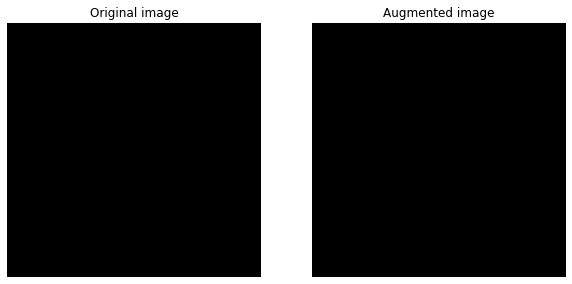

In [9]:
import numpy as np
bayer = isp_it3(bayer)
rgb = bilinear_interpolation(bayer)
apply_gamma = tf.image.adjust_gamma(rgb, gamma=0.45)
visualize(apply_gamma, rgb)

# Bilinear Interpolation Algorithms 

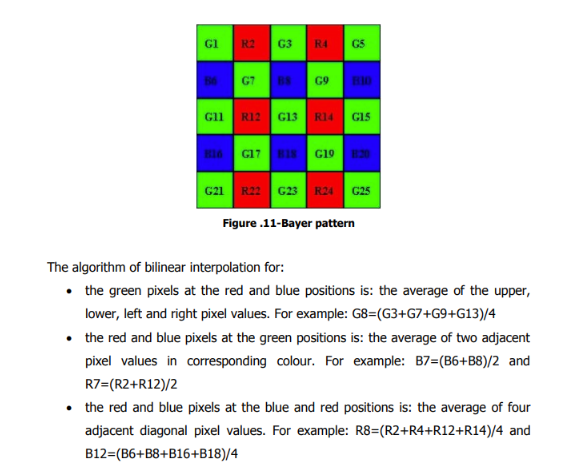

The algorithm of bilinear interpolation for: 

* the green pixels at the red and blue positions is: the average of the upper, lower, left and right pixel values. For example: G8=(G3+G7+G9+G13)/4 

* the red and blue pixels at the green positions is: the average of two adjacent pixel values in corresponding colour. For example: B7=(B6+B8)/2 and R7=(R2+R12)/2

* the red and blue pixels at the blue and red positions is: the average of four adjacent diagonal pixel values. For example: R8=(R2+R4+R12+R14)/4 and B12=(B6+B8+B16+B18)/4

* need to pad the image 
 
 

In [7]:
import matplotlib.pyplot as plt

def visualize(original, augmented, figure_size=(10,5)):
    fig = plt.figure(figsize=figure_size)
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

In [ ]:
import tensorflow as tf

bayer = "/app/event_detection/data/train/something/1690946224353_3876460_0_86384835-3f94-62cc-9523-e31d807f40fa.bayer"
bayer = tf.io.read_file(bayer)
bayer = tf.io.decode_raw(bayer, tf.uint8)
image_shape = [324, 324]
bayer = tf.reshape(bayer, image_shape)
bayer.shape